## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datetime import datetime
from pathlib import Path
import pandas as pd

import torchtext.data as ttd

In [3]:
folder=Path('/content/gdrive/My Drive/Teaching/NLP/8_Sequence_Code')

In [4]:
df = pd.read_csv(folder / 'airline.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,Id,text,Target
0,1,@USAirways ! THE WORST in customer service. @...,-1
1,2,@united call wait times are over 20 minutes an...,-1
2,3,@JetBlue what's up with the random delay on fl...,-1
3,4,@AmericanAir Good morning! Wondering why my p...,0
4,5,@united UA 746. Pacific Rim and Date Night cut...,-1


In [6]:
# drop unnecessary columns
df = df.drop(["Id"], axis=1)

In [7]:
df.head()

,text,Target
0,@USAirways ! THE WORST in customer service. @...,-1
1,@united call wait times are over 20 minutes an...,-1
2,@JetBlue what's up with the random delay on fl...,-1
3,@AmericanAir Good morning! Wondering why my p...,0
4,@united UA 746. Pacific Rim and Date Night cut...,-1


In [8]:
df['Target']= df['Target'] +1

In [9]:
df['Target'].value_counts()

0    4566
1    1536
2    1218
Name: Target, dtype: int64

In [10]:
df.columns = ['data', 'labels']

In [11]:
df=df.sample(frac=1)

In [12]:
df.head()

,data,labels
6042,@JetBlue oh. Makes sense. My bad.,1
5256,@USAirways can i please have someone call me 7...,1
6046,@VirginAmerica @SSal thanks!,2
242,@USAirways I have been doing that all day. Can...,0
2990,@united maybemange the airline alittlebetter. ...,0


In [13]:
df.to_csv(folder / 'airline2.csv', index=False)

In [14]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=False,
    tokenize='spacy',
    pad_first=True)

LABEL = ttd.LabelField()
#LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

dataset = ttd.TabularDataset(
    path= folder / 'airline2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

In [15]:
import random
SEED=1234
train_dataset, test_dataset = dataset.split(split_ratio=0.7,random_state = random.seed(SEED)) # default is 0.7

In [16]:
SEED=1234
train_dataset, valid_dataset = train_dataset.split(random_state = random.seed(SEED)) # default is 0.7

In [17]:
print(f'Number of training examples: {len(train_dataset)}')
print(f'Number of validation examples: {len(valid_dataset)}')
print(f'Number of testing examples: {len(test_dataset)}')

Number of training examples: 3587
Number of validation examples: 1537
Number of testing examples: 2196


In [18]:
MAX_VOCAB_SIZE = 25000

TEXT.build_vocab(train_dataset, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

In [19]:
LABEL.build_vocab(train_dataset)

In [20]:
vocab_text = TEXT.vocab

In [21]:
vocab_text.stoi

defaultdict(<function torchtext.vocab._default_unk_index>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'to': 3,
             'I': 4,
             'the': 5,
             '!': 6,
             '?': 7,
             'a': 8,
             ',': 9,
             'you': 10,
             'for': 11,
             '#': 12,
             '@united': 13,
             'and': 14,
             'on': 15,
             'flight': 16,
             'my': 17,
             '@AmericanAir': 18,
             '@USAirways': 19,
             'is': 20,
             'in': 21,
             '@SouthwestAir': 22,
             'of': 23,
             "n't": 24,
             '@JetBlue': 25,
             ' ': 26,
             'me': 27,
             'it': 28,
             'have': 29,
             'was': 30,
             'that': 31,
             'with': 32,
             'at': 33,
             'your': 34,
             '-': 35,
             "'s": 36,
             'not': 37,
             'do': 38

In [22]:
vocab_text.itos

['<unk>',
 '<pad>',
 '.',
 'to',
 'I',
 'the',
 '!',
 '?',
 'a',
 ',',
 'you',
 'for',
 '#',
 '@united',
 'and',
 'on',
 'flight',
 'my',
 '@AmericanAir',
 '@USAirways',
 'is',
 'in',
 '@SouthwestAir',
 'of',
 "n't",
 '@JetBlue',
 ' ',
 'me',
 'it',
 'have',
 'was',
 'that',
 'with',
 'at',
 'your',
 '-',
 "'s",
 'not',
 'do',
 'get',
 'be',
 'from',
 'this',
 'but',
 'no',
 'Cancelled',
 'are',
 'we',
 'service',
 'can',
 'an',
 'now',
 'just',
 'so',
 '"',
 '...',
 ';',
 'up',
 '&',
 'time',
 'been',
 'customer',
 'help',
 'Flight',
 'amp',
 'out',
 "'m",
 'hours',
 'all',
 'flights',
 'hold',
 'they',
 'there',
 'us',
 'when',
 '_',
 'our',
 '2',
 'what',
 'Thanks',
 'will',
 'ca',
 'bag',
 'gate',
 "'ve",
 'still',
 'call',
 'thanks',
 'one',
 'plane',
 'would',
 ':',
 'Flightled',
 '@VirginAmerica',
 'delayed',
 'if',
 'about',
 'had',
 'back',
 'Late',
 'how',
 'need',
 'did',
 'You',
 'hour',
 ')',
 'or',
 'has',
 '$',
 '/',
 'am',
 'got',
 'more',
 'as',
 'waiting',
 'why',
 '(

In [23]:
len(vocab_text)

8360

In [24]:
vocab_label = LABEL.vocab

In [25]:
vocab_label.stoi

defaultdict(<function torchtext.vocab._default_unk_index>,
            {'0': 0, '1': 1, '2': 2})

In [26]:
vocab_label.itos

['0', '1', '2']

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [28]:
train_iter, valid_iter, test_iter = ttd.BucketIterator.splits((train_dataset,valid_dataset,test_dataset), 
                              sort_key=lambda x: len(x.data),
                              #sort_key=None,
                              batch_sizes=(64,256,256), 
                              device=device)

In [29]:
for batch in train_iter:
  print("inputs:", batch.data, batch.data.shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([[  1,   1,   1,  ..., 201, 685,   2],
        [  1,   1,   1,  ...,  24, 189,  28],
        [  1,   1,   1,  ..., 721, 247,   7],
        ...,
        [  1,   1,  18,  ...,  42, 330,   2],
        [  1,   1,   1,  ..., 148,  83, 553],
        [  1,   1,   1,  ...,   6,   6,   6]], device='cuda:0') torch.Size([64, 35])
targets: tensor([0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1], device='cuda:0') shape: torch.Size([64])


In [30]:
for batch in valid_iter:
  print("inputs:", batch.data, batch.data.shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([[  13,   42,   61,  ..., 1374,    0,    2],
        [  25,   20,    5,  ...,    0,   12,    0],
        [  25,  119,  431,  ...,  299,    6,    6],
        ...,
        [   1,    1,    1,  ...,    1,   19, 1448],
        [   1,    1,    1,  ...,    1,   19,   87],
        [   1,    1,    1,  ...,    1,   22,  228]], device='cuda:0') torch.Size([256, 12])
targets: tensor([0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0,
        2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1,
        2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0,
        1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1,
        2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0,

In [31]:
for batch in test_iter:
  print("inputs:", batch.data[0], batch.data[0].shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([ 19,  18,  46, 156, 573,   0,   7,  12,   0], device='cuda:0') torch.Size([9])
targets: tensor([1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2,
        0, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1,
        1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2,
        1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2,
        2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0,
        1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0,
        1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1,
        0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2], device='cuda:0') shape: torch.Size([256

In [32]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs, bidirectional, dropout_rate):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers
    self.num_diections= bidirectional
    self.dropout_rate=dropout_rate
    
    # embedding layer
    self.embed = nn.Embedding(self.V, self.D)
    
    # rnn layers
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        bidirectional=self.num_diections,
        dropout= self.dropout_rate,
        batch_first=True)
    
    # dense layer
    self.fc = nn.Linear(self.M *2 , self.K)

    # dropout layer
    self.dropout= nn.Dropout(self.dropout_rate)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L*2, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L*2, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    # X (batch_size, sentence length)
    embedding = self.embed(X)   # (batch_size, sentence_length, emd_dim)
    embedding= self.dropout(embedding) # (batch_size, sentence_length, emd_dim)

    # get RNN unit output
    output, (hidden,cell) = self.rnn(embedding, (h0, c0))


    #output = [batch size, sent len, hid dim * num directions]
    #hidden = [num layers * num directions, batch size, hid dim]
    #cell = [num layers * num directions, batch size, hid dim]

    # max pool
    output, _ = torch.max(output, 1)
    output= self.dropout(output)
    # we only want h(T) at the final time step
    output = self.fc(output)
    return output

In [33]:
n_vocab = len(TEXT.vocab)
embed_dim = 100
n_hidden = 50
n_rnnlayers = 2
n_outputs =3 
bidirectional = True 
dropout_rate = 0.5 


In [34]:
model = RNN(n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs, bidirectional, dropout_rate)
model.to(device)

RNN(
  (embed): Embedding(8360, 100)
  (rnn): LSTM(100, 50, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=100, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

## Model Summary

In [35]:
print(model)

RNN(
  (embed): Embedding(8360, 100)
  (rnn): LSTM(100, 50, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=100, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


## Model Parameters

In [36]:
for name, param in model.named_parameters():
  print(name, param.shape)

embed.weight torch.Size([8360, 100])
rnn.weight_ih_l0 torch.Size([200, 100])
rnn.weight_hh_l0 torch.Size([200, 50])
rnn.bias_ih_l0 torch.Size([200])
rnn.bias_hh_l0 torch.Size([200])
rnn.weight_ih_l0_reverse torch.Size([200, 100])
rnn.weight_hh_l0_reverse torch.Size([200, 50])
rnn.bias_ih_l0_reverse torch.Size([200])
rnn.bias_hh_l0_reverse torch.Size([200])
rnn.weight_ih_l1 torch.Size([200, 100])
rnn.weight_hh_l1 torch.Size([200, 50])
rnn.bias_ih_l1 torch.Size([200])
rnn.bias_hh_l1 torch.Size([200])
rnn.weight_ih_l1_reverse torch.Size([200, 100])
rnn.weight_hh_l1_reverse torch.Size([200, 50])
rnn.bias_ih_l1_reverse torch.Size([200])
rnn.bias_hh_l1_reverse torch.Size([200])
fc.weight torch.Size([3, 100])
fc.bias torch.Size([3])


In [37]:
pretrained_embeddings = TEXT.vocab.vectors
print(pretrained_embeddings.shape)

torch.Size([8360, 100])


In [38]:
model.embed.weight.data.copy_(pretrained_embeddings)

tensor([[-0.8670,  0.8830, -1.3987,  ..., -1.0966, -0.7091, -0.6097],
        [-1.2892,  0.6960,  0.6407,  ..., -1.5743,  1.2355, -0.1950],
        [-0.3398,  0.2094,  0.4635,  ..., -0.2339,  0.4730, -0.0288],
        ...,
        [-0.6299,  1.2603,  1.5602,  ...,  0.8941, -0.5832, -0.2620],
        [-0.4996,  0.1504,  0.1121,  ...,  0.3503, -0.5189, -2.5671],
        [-0.2489,  0.9412,  0.0212,  ...,  2.0049,  0.4233,  0.6766]],
       device='cuda:0')

In [39]:
unk_idx = TEXT.vocab.stoi[TEXT.unk_token]
pad_idx = TEXT.vocab.stoi[TEXT.pad_token]

model.embed.weight.data[unk_idx] = torch.zeros(embed_dim)
model.embed.weight.data[pad_idx] = torch.zeros(embed_dim)

print(model.embed.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3398,  0.2094,  0.4635,  ..., -0.2339,  0.4730, -0.0288],
        ...,
        [-0.6299,  1.2603,  1.5602,  ...,  0.8941, -0.5832, -0.2620],
        [-0.4996,  0.1504,  0.1121,  ...,  0.3503, -0.5189, -2.5671],
        [-0.2489,  0.9412,  0.0212,  ...,  2.0049,  0.4233,  0.6766]],
       device='cuda:0')


## Training Loop

In [40]:
learning_rate = 0.0005
epochs=20
# STEP 5: INSTANTIATE LOSS CLASS
criterion = nn.CrossEntropyLoss()

# STEP 6: INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Freeze embedding Layer

#freeze embeddings
#model.embed.weight.requires_grad  = False

# STEP 7: TRAIN THE MODEL

train_losses= np.zeros(epochs)
valid_losses= np.zeros(epochs)


for epoch in range(epochs):
  
  t0= datetime.now()
  train_loss=[]
  
  model.train()
  for batch in train_iter:
   
    # forward pass
    output= model(batch.data)
    loss=criterion(output,batch.label)

    # set gradients to zero 
    optimizer.zero_grad()

    # backward pass
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  
  train_loss=np.mean(train_loss)
      
  valid_loss=[]
  model.eval()
  with torch.no_grad():
    for batch in valid_iter:
 
      # forward pass
      output= model(batch.data)
      loss=criterion(output,batch.label)
      
      valid_loss.append(loss.item())

    valid_loss=np.mean(valid_loss)
  
  # save Losses
  train_losses[epoch]= train_loss
  valid_losses[epoch]= valid_loss
  dt= datetime.now()-t0
  print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}    Valid Loss: {valid_loss:.4f}, Duration: {dt}')

Epoch 1/20, Train Loss: 0.9281    Valid Loss: 0.7918, Duration: 0:00:00.723246
Epoch 2/20, Train Loss: 0.8598    Valid Loss: 0.7450, Duration: 0:00:00.649219
Epoch 3/20, Train Loss: 0.8256    Valid Loss: 0.6989, Duration: 0:00:00.670894
Epoch 4/20, Train Loss: 0.7818    Valid Loss: 0.6917, Duration: 0:00:00.754729
Epoch 5/20, Train Loss: 0.7473    Valid Loss: 0.6665, Duration: 0:00:00.674228
Epoch 6/20, Train Loss: 0.7125    Valid Loss: 0.6555, Duration: 0:00:00.659192
Epoch 7/20, Train Loss: 0.6710    Valid Loss: 0.6465, Duration: 0:00:00.725555
Epoch 8/20, Train Loss: 0.6593    Valid Loss: 0.6353, Duration: 0:00:00.664316
Epoch 9/20, Train Loss: 0.6224    Valid Loss: 0.6080, Duration: 0:00:00.698649
Epoch 10/20, Train Loss: 0.6014    Valid Loss: 0.6713, Duration: 0:00:00.652071
Epoch 11/20, Train Loss: 0.5631    Valid Loss: 0.7593, Duration: 0:00:00.647940
Epoch 12/20, Train Loss: 0.5721    Valid Loss: 0.5682, Duration: 0:00:00.657098
Epoch 13/20, Train Loss: 0.5267    Valid Loss: 0.

In [54]:
# Accuracy- write a function to get accuracy
# use this function to get accuracy and print accuracy
def get_accuracy(data_iter, model):
  model.eval()
  with torch.no_grad():
    correct =0 
    total =0
    
    for batch in data_iter:

      output=model(batch.data)
      _,indices = torch.max(output,dim=1)
      correct+= (batch.label==indices).sum().item()
      total += batch.label.shape[0]
    
    acc= correct/total

    return acc

In [55]:
train_acc = get_accuracy(train_iter, model)
valid_acc = get_accuracy(valid_iter, model)
test_acc = get_accuracy(test_iter ,model)
print(f'Train acc: {train_acc:.4f},\t Valid acc: {valid_acc:.4f},\t Test acc: {test_acc:.4f}')

Train acc: 0.8706,	 Valid acc: 0.7749,	 Test acc: 0.7709


In [56]:
# Write a function to get predictions

def get_predictions(test_iter, model):
  model.eval()
  with torch.no_grad():
    predictions= np.array([])
    y_test= np.array([])

    for batch in test_iter:
      
      output=model(batch.data)
      _,indices = torch.max(output,dim=1)
      predictions=np.concatenate((predictions,indices.cpu().numpy())) 
      y_test = np.concatenate((y_test,batch.label.cpu().numpy())) 
      
  return y_test, predictions

In [57]:
y_test, predictions=get_predictions(test_iter, model)

In [58]:
predictions.max()

2.0

In [59]:
# Confusion Matrix

cm=confusion_matrix(y_test,predictions)
cm

array([[1297,   43,   30],
       [ 242,  167,   59],
       [  96,   33,  229]])

In [60]:
# Write a function to print confusion matrix
# plot confusion matrix
# need to import confusion_matrix from sklearn for this function to work
# need to import seaborn as sns
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true,y_pred,normalize=None):
  cm=confusion_matrix(y_true,y_pred,normalize=normalize)
  fig, ax = plt.subplots(figsize=(6,5))
  if normalize == None:
    fmt='d'
    fig.suptitle('Confusion matrix without Normalization', fontsize=12)
        
  else :
    fmt='0.2f'
    fig.suptitle('Normalized confusion matrix', fontsize=12)
    
  ax=sns.heatmap(cm,cmap=plt.cm.Blues,annot=True,fmt=fmt)
  ax.axhline(y=0, color='k',linewidth=1)
  ax.axhline(y=cm.shape[1], color='k',linewidth=2)
  ax.axvline(x=0, color='k',linewidth=1)
  ax.axvline(x=cm.shape[0], color='k',linewidth=2)
 
  ax.set_xlabel('Predicted label', fontsize=12)
  ax.set_ylabel('True label', fontsize=12)

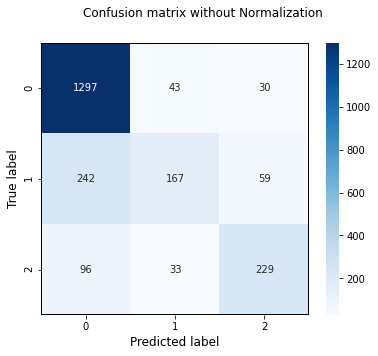

In [61]:
plot_confusion_matrix(y_test,predictions)

In [62]:
### Make predictions ###

# get some random test data
df[df.labels == 1].sample(3)

,data,labels
6808,"Now put your baggage fees back on ""free."" RT @...",1
1153,@SouthwestAir ...and how does one obtain this ...,1
5534,@AmericanAir No snow in St. Louis. Cold but no...,1


In [63]:
small_sample = df[df.labels == 1].sample(3)
with open(folder / 'sample_test.csv', 'w') as f:
  f.write("data\n") # header
  for i, row in small_sample.iterrows():
    f.write(row['data'] + "\n")

In [64]:
sample_dataset = ttd.TabularDataset(
    path=folder / 'sample_test.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT)]
)

In [65]:
sample_iter = ttd.BucketIterator(
    sample_dataset,
    batch_size=64,
    sort_key=lambda x: len(x.data),
    device=device)

In [66]:
for batch in sample_iter:
  # Returns a Batch object, not tensor
  print("inputs:", batch.data)

  # Forward pass
  outputs = model(batch.data)

  # Print logits
  print(outputs)

inputs: tensor([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,   22,  354,   72,  157,    0,  366,   35, 5708,  171,   35,
         2877],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,   13,    4,  228,   21,   17, 1324,    2,   26,  127,   10,
            2],
        [ 297,    3, 2955,   12, 1740,   35, 3527,   41,   12,  426,    3,   12,
         2593, 3936, 3061, 1740,   35, 2192,  527, 3706,  401, 1400, 3476,   12,
          990]], device='cuda:0')
tensor([[-1.4128,  1.1648,  0.3356],
        [-1.1818, -0.9596,  2.0799],
        [-0.4362,  1.4350, -0.7107]], device='cuda:0', grad_fn=<AddmmBackward>)
